# Problem statement
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

# Datasets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

Item_Identifier

Item_Weight

Item_Fat_Content

Item_Visibility

Item_Type

Item_MRP

Outlet_Identifier

Outlet_Establishment_Year

Outlet_Size

Outlet_Location_Type

Outlet_Type

# Goal

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np
import scipy.stats as st

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



#ML models for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Collection

Load dataset

In [2]:
# reading train and test data

train_data = pd.read_csv('E:\Technocolabs_Internship\Big_data_marts\Train.csv')
test_data = pd.read_csv('E:\Technocolabs_Internship\Big_data_marts\Test.csv')


In [3]:
# find out shape of each train and test data
print("No of rows and column in train dataset ",train_data.shape)
print("No of rows and column in test dataset " ,test_data.shape)

No of rows and column in train dataset  (8523, 12)
No of rows and column in test dataset  (5681, 11)


In [4]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)

#details of train data
print("Details of Train data")
train_data.head(5)


Details of Train data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print("Details of Test data")
test_data.head(5)

Details of Test data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


 Observation:

Item_Outlet_Sales is our target feature thats why it is present only in Train dataset not in test dataset .

# Data Analysis

### Checking null value¶

In [6]:
#checking null value for trainning data

train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#checking null value for testdata
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Firstly I join both train and test data for cleaning purpose otherwise I have to do all cleaning process two times

In [8]:
train_data["source"]="train"
test_data["source"]="test"
df=pd.concat([train_data,test_data],ignore_index=True)

In [9]:
# shape of our new dataset
df.shape

(14204, 13)

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
#columns present in our final dataset

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

Observation:
    
 Now we have 13 columns means source column is added that represent which is our test data and which is our train data.

In [12]:
df.info() # information obout datatypes and memory used by datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

Observation:

    - Both Categorical and Continuous type data is present there.
    - Lots of missing value are present so we have to find out and handle it .

### Statistical data analysis

In [13]:
# only for continuos variable
df.describe(exclude=[object]).style.background_gradient(cmap='winter_r')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
#for categorical variable
df.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


Observation:
    
    -Count of Item-weight is less than as compaire to another column means missing value are present.

    -Very much difference between min value and max value of item_outlet_sales means data is more spred.

    -Minimum value of item visibility is 0 means some item is not present in outlets.
    
    -Hugeamount of unique value present in Item_Identifiers.

### Duplicates values

In [15]:
# Check for duplicates
#if duplicate record present then drop it
idsTotal = df.shape[0]
idsDupli = df[df['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 12645 duplicate IDs for 14204 total entries


This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.

### Check unique values present in each Column¶

In [16]:
df.nunique().to_frame("Unique Values")

,Unique Values
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,13006
Item_Type,16
Item_MRP,8052
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


Lots of Item_visibility is present that affect our model accuracy so we candrop it.

### Check for missing value

<AxesSubplot:>

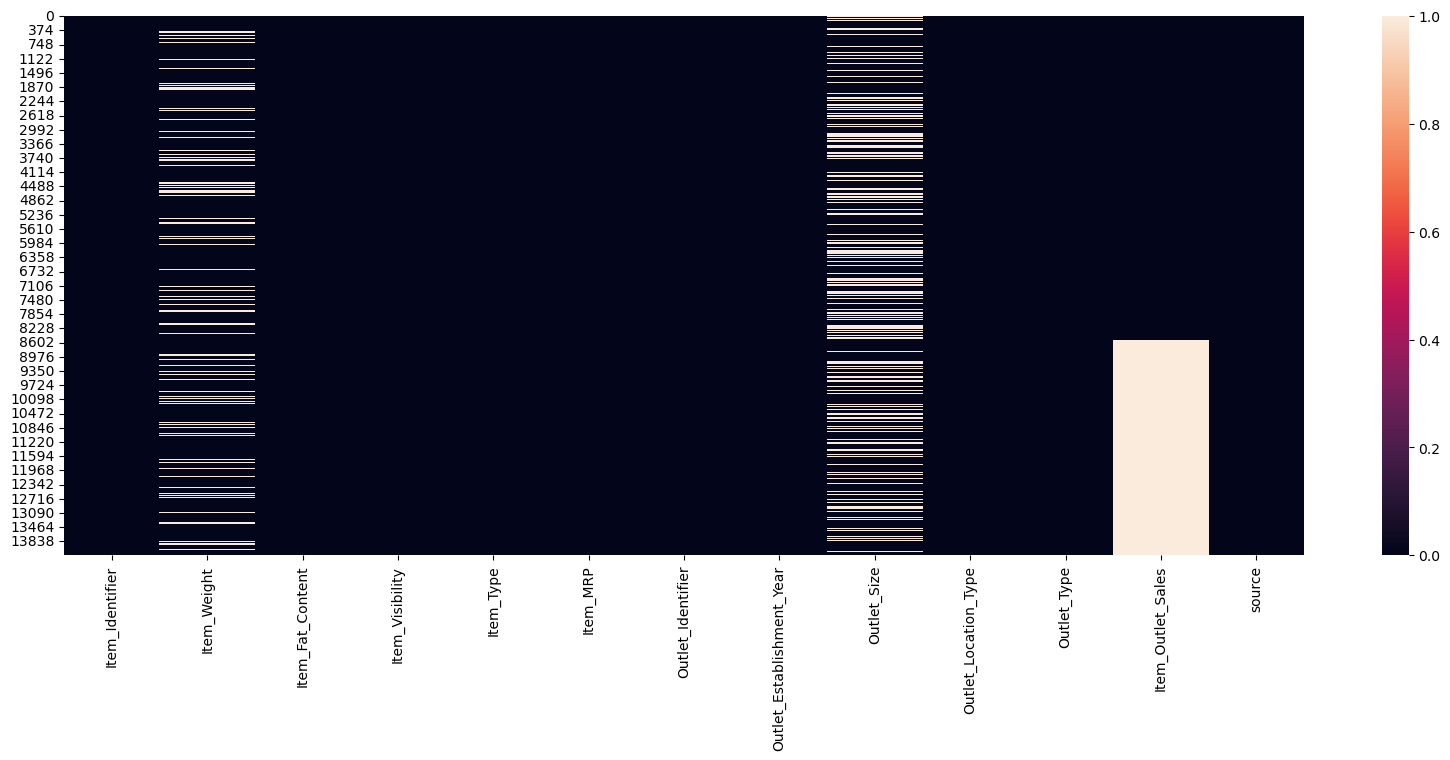

In [17]:
plt.figure(figsize = (20, 7))
sns.heatmap(df.isnull()) # check missing value by visualization

In [18]:
total_missing=df.isnull().sum().sum()

# how many total missing values do we have?
total_cells = np.product(df.shape)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("total {} % missing values is present ".format(np.round(percent_missing),3))


total 7.0 % missing values is present 


In [19]:
# find out in which column missing value is present

missing_features=[features for features in df.columns if df[features].isnull().sum()>0]
missing_features

['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales']

In [20]:
# percentage of missing value in each  column

for feature in missing_features:
    print("{}: {}  % missing values is".format(feature,np.round(df[feature].isnull().mean(),3)))


Item_Weight: 0.172  % missing values is
Outlet_Size: 0.283  % missing values is
Item_Outlet_Sales: 0.4  % missing values is


### Segregate the numerical and Categorical variables¶

In [21]:
categorical = [feature for feature in df.columns if df[feature].dtypes=='object']
print("Number of Categorical Features: {}".format(len(categorical)))
print("Categorical Features: ",categorical)

Number of Categorical Features: 8
Categorical Features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']


In [22]:
numerical = [feature for feature in df.columns if df[feature].dtypes!='object']
print("Number of numerical = Features: {}".format(len(numerical)))
print("numerical = Features: ", numerical )

Number of numerical = Features: 5
numerical = Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


### Unique values for each Categorical features:¶

In [23]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in categorical:
        print(i)
        print(df[i].value_counts())
        print('************************************************')

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
************************************************
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
************************************************
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
************************************************
O

Observation:
    
-There are 16 categories in Item_Type but Basicaly there is 3 type of item either Food ,Drink or not_consumables.

-Item_Identifier is a Id for Every Item_Type .

-In Item_Fat_content Low Fat is written three type and Regular fat is two type so we have to replace it by single value.

## Univariate Visualization

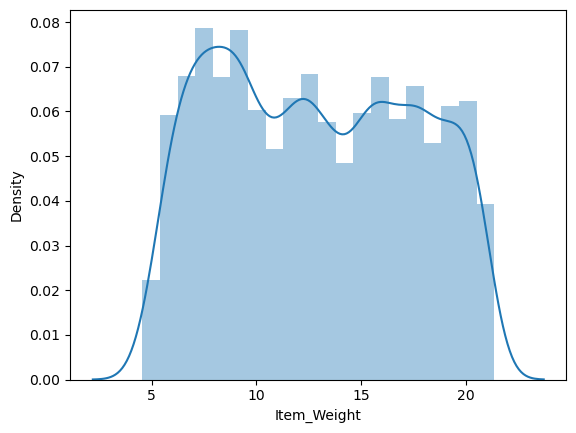

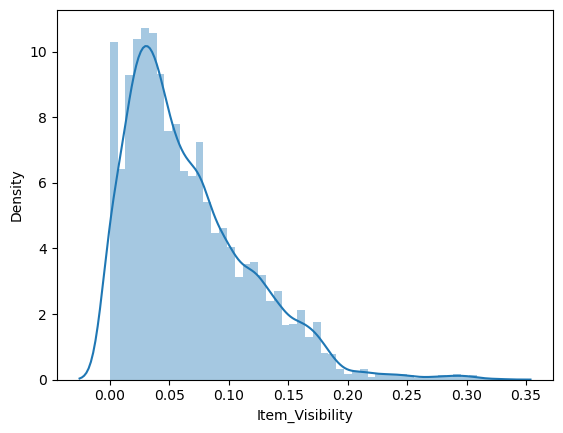

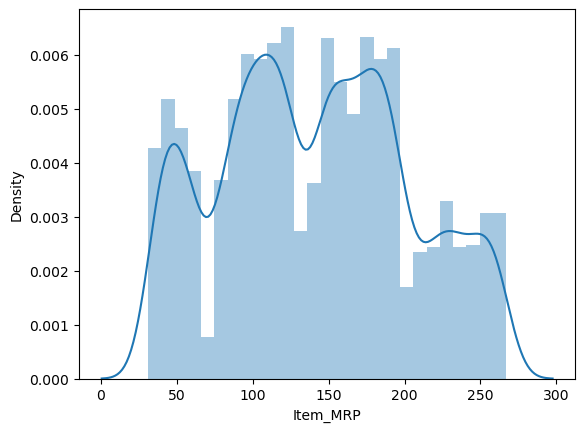

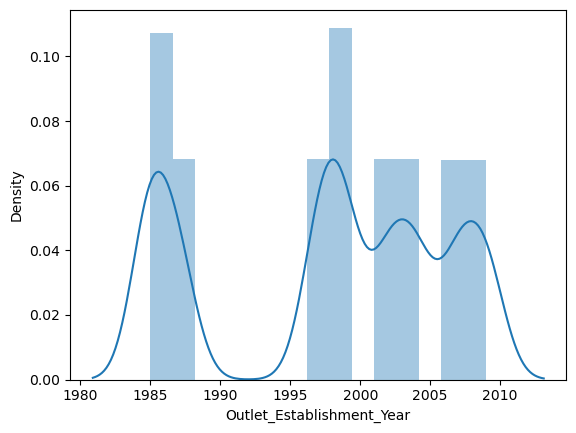

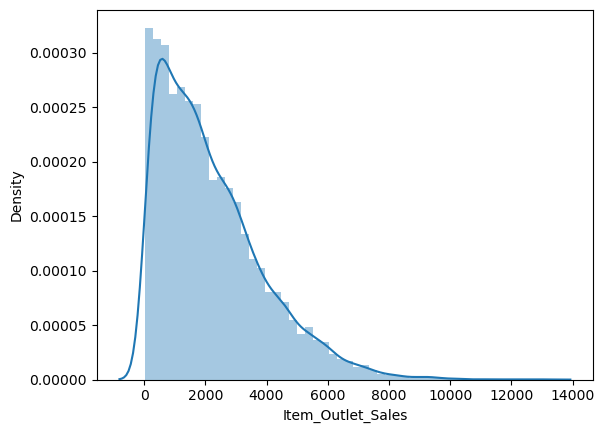

In [24]:
#distribution plot for each columns that contain continues variable and find out skewness present in columns

for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

observation:

skewness is present in item_visibility and item_outlet_sales

Item_Weight and Item_MRP is normaly distri buted

In year 1990 to 1995 no OUtlet is Establised


### Box plot to detect Outliers

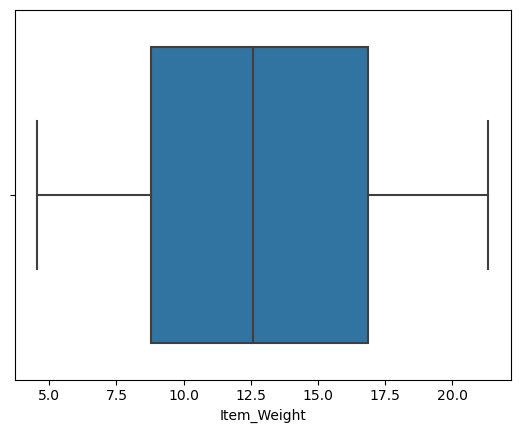

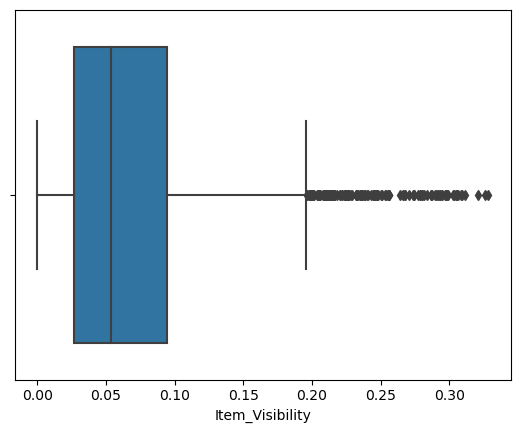

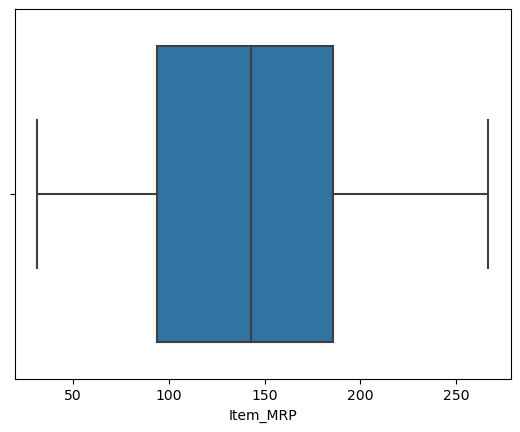

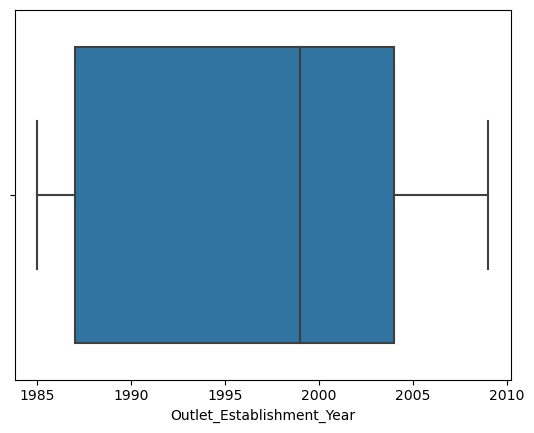

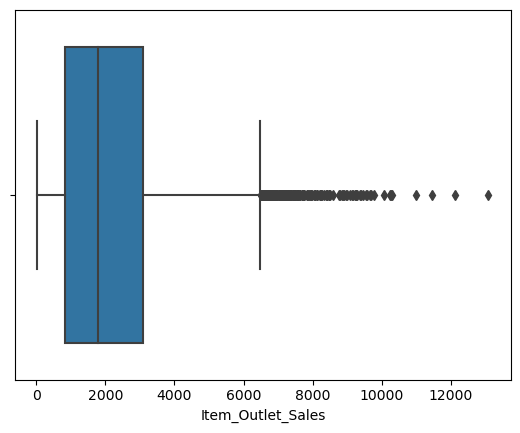

In [25]:
#box plot for each columns that contain continues variable

for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

Observation:
    
Outliers present in Item_Visibility and Item_Outlet_Sales

## Count plot for categorical variable

In [26]:
Train_categorical=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content']

						 *** Item_Type *** 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


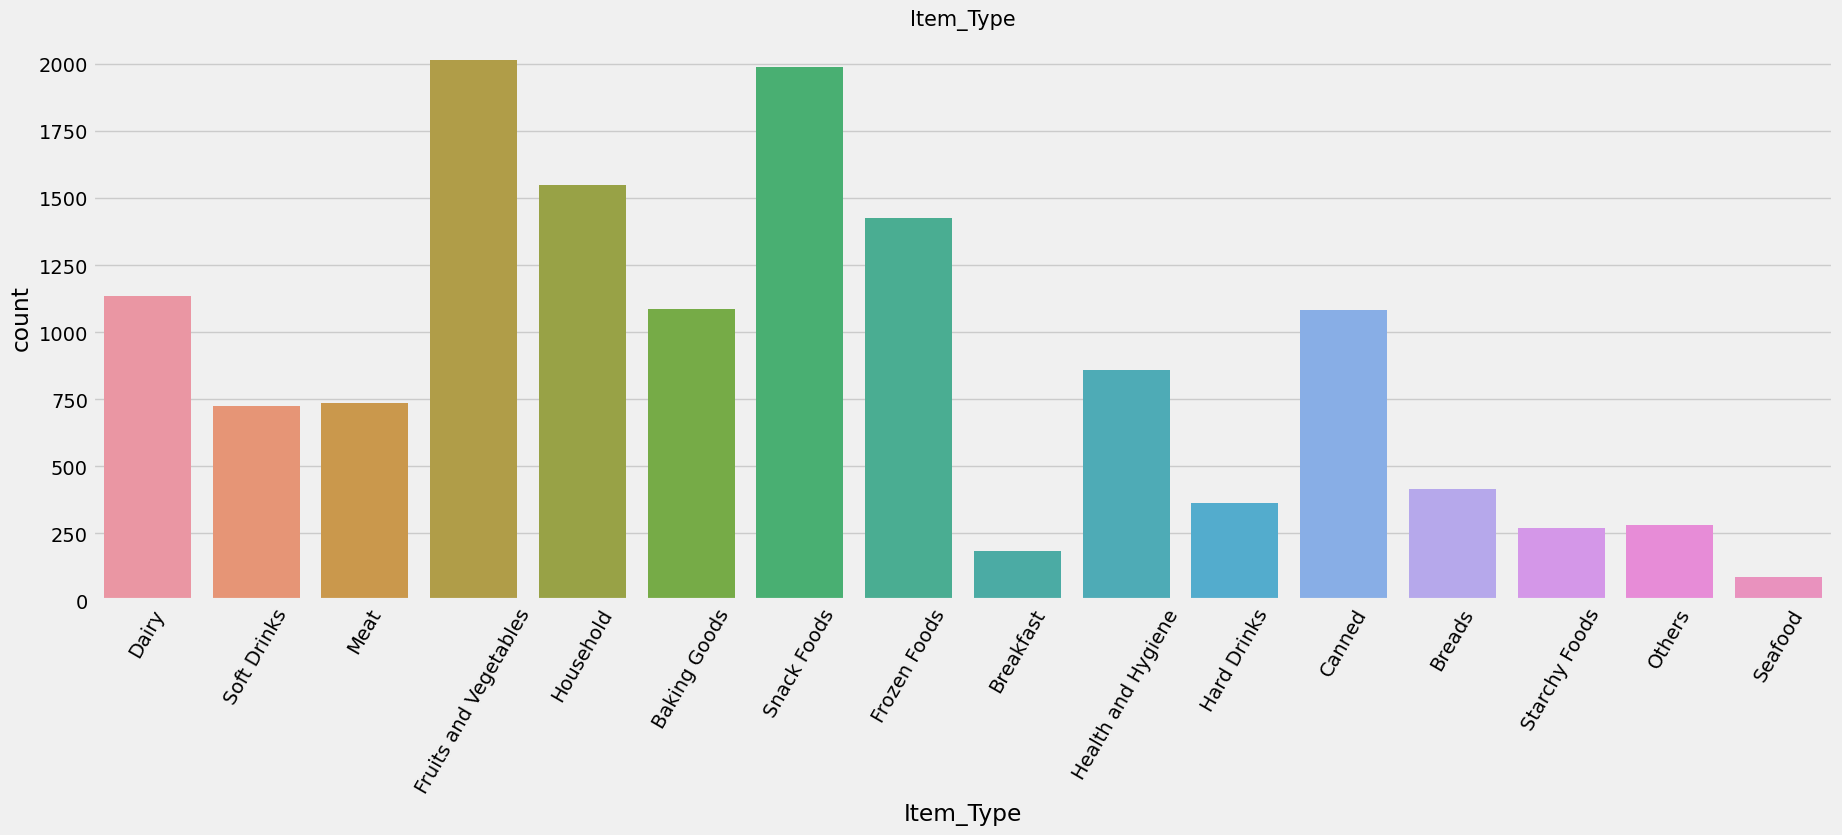

						 *** Outlet_Size *** 

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


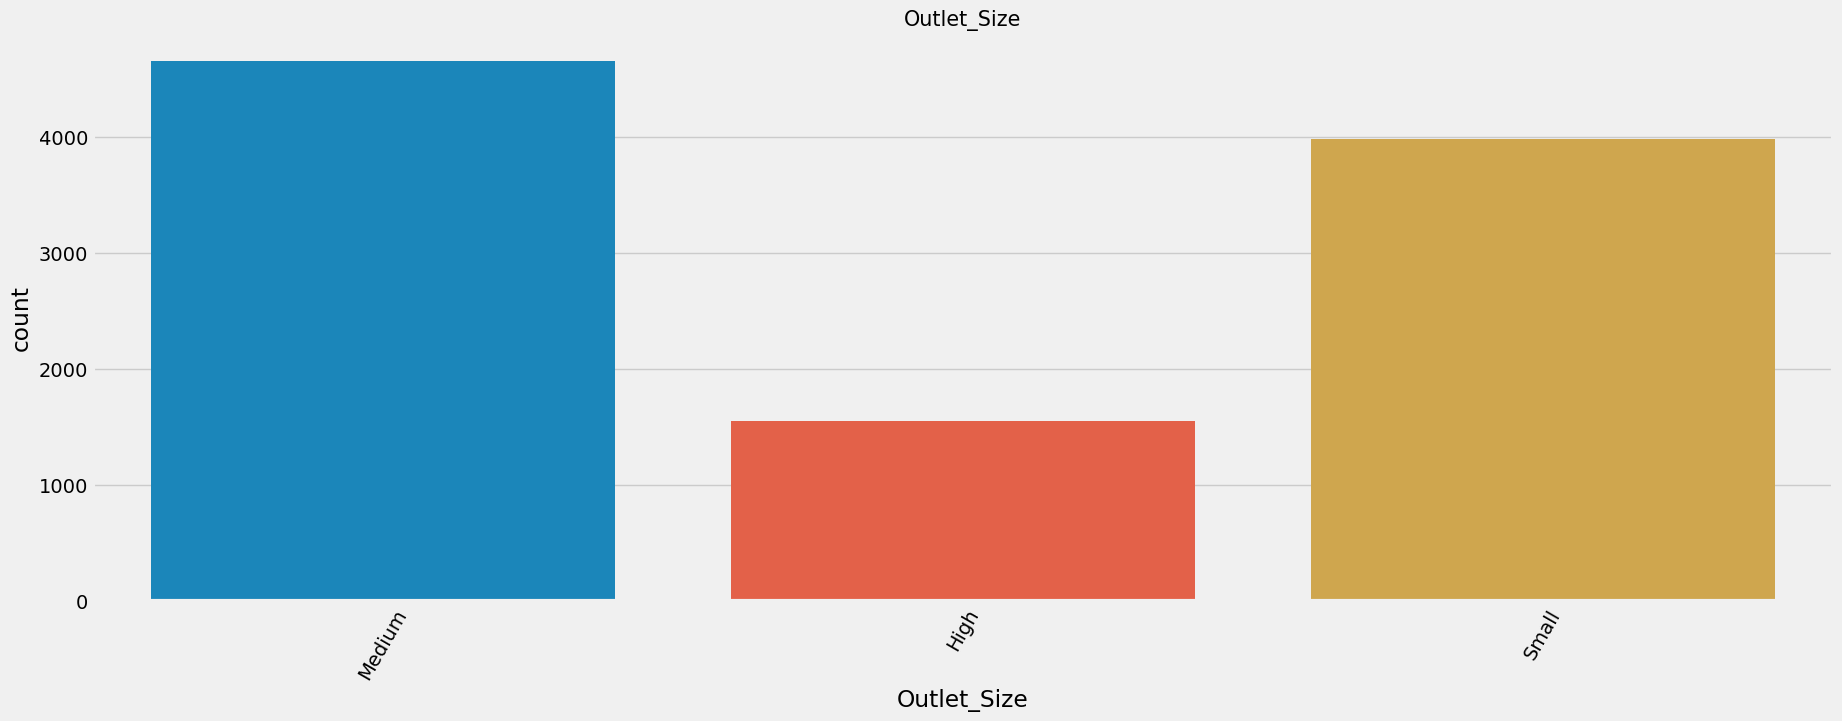

						 *** Outlet_Location_Type *** 

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


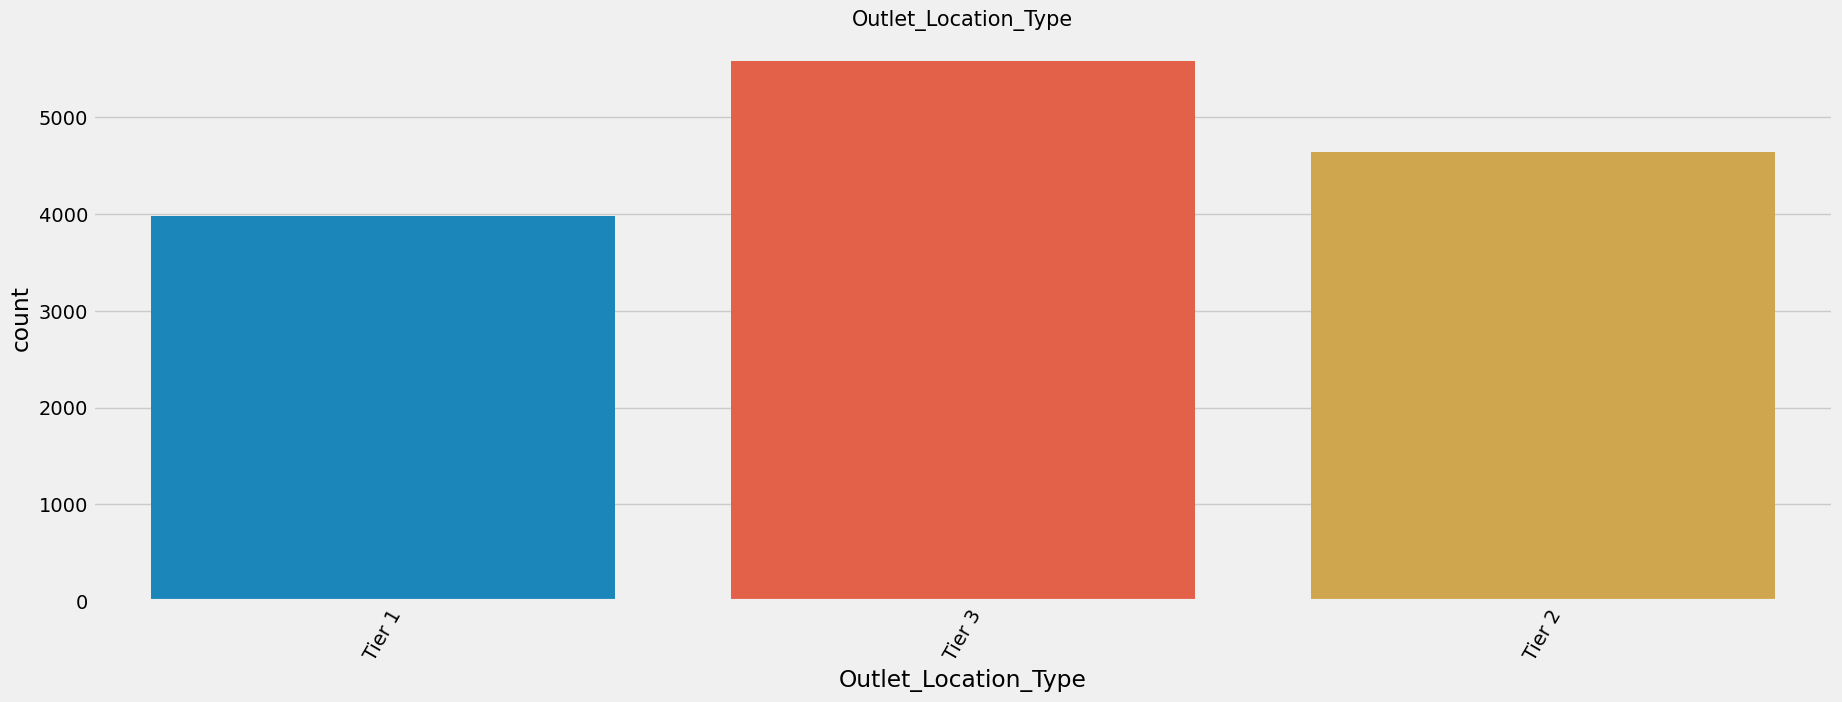

						 *** Outlet_Type *** 

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


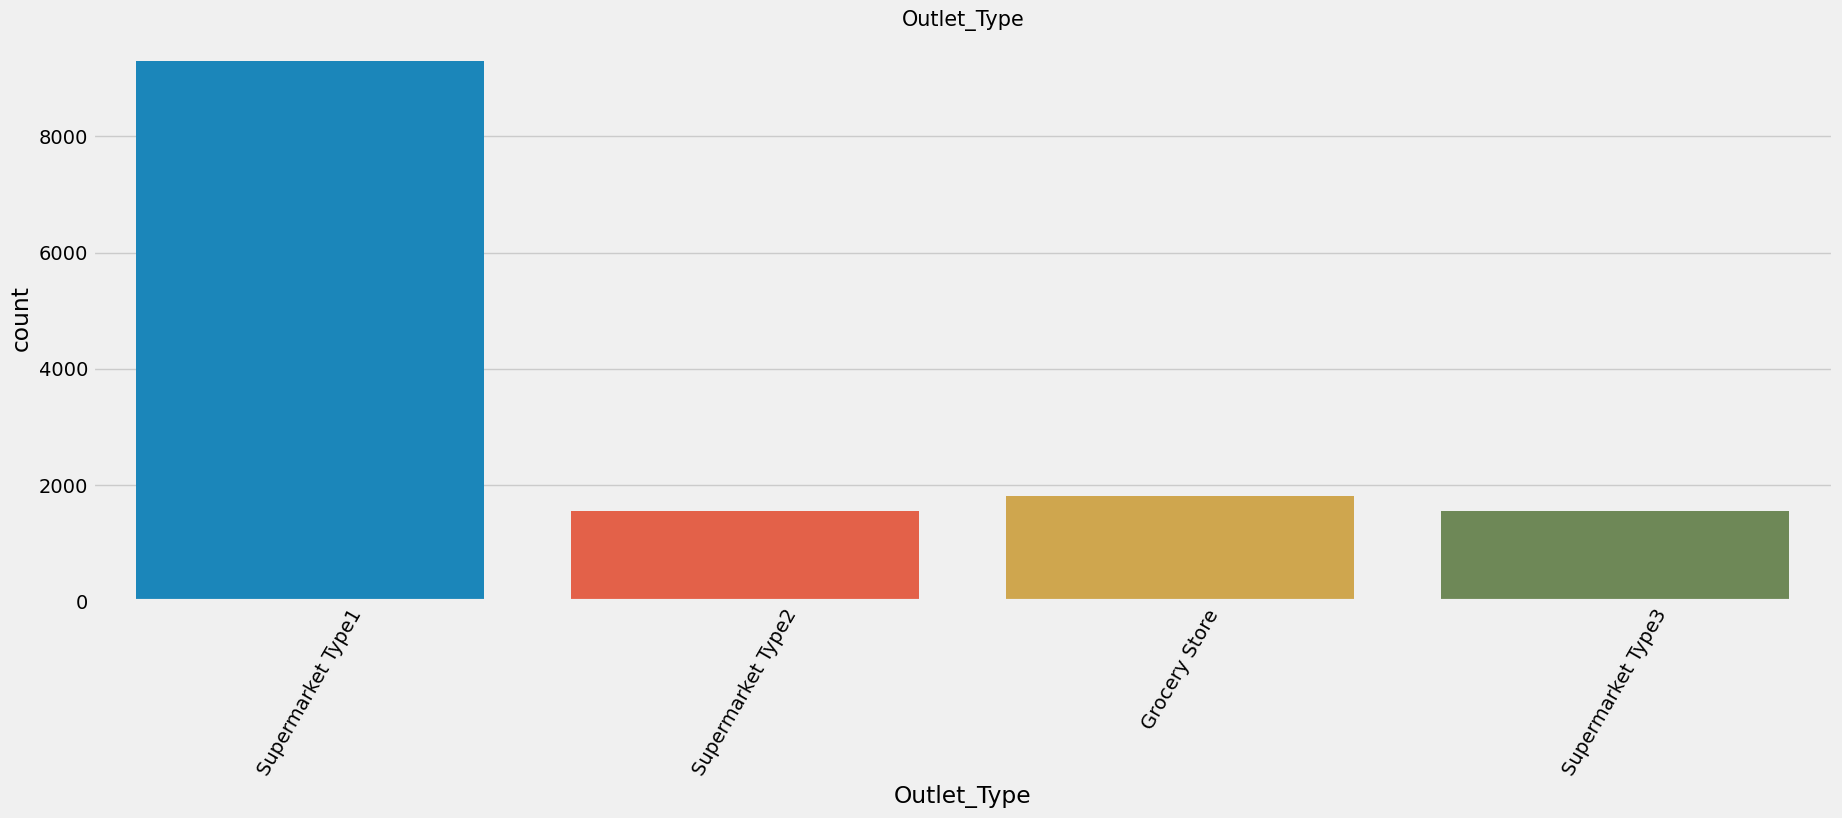

						 *** Item_Fat_Content *** 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


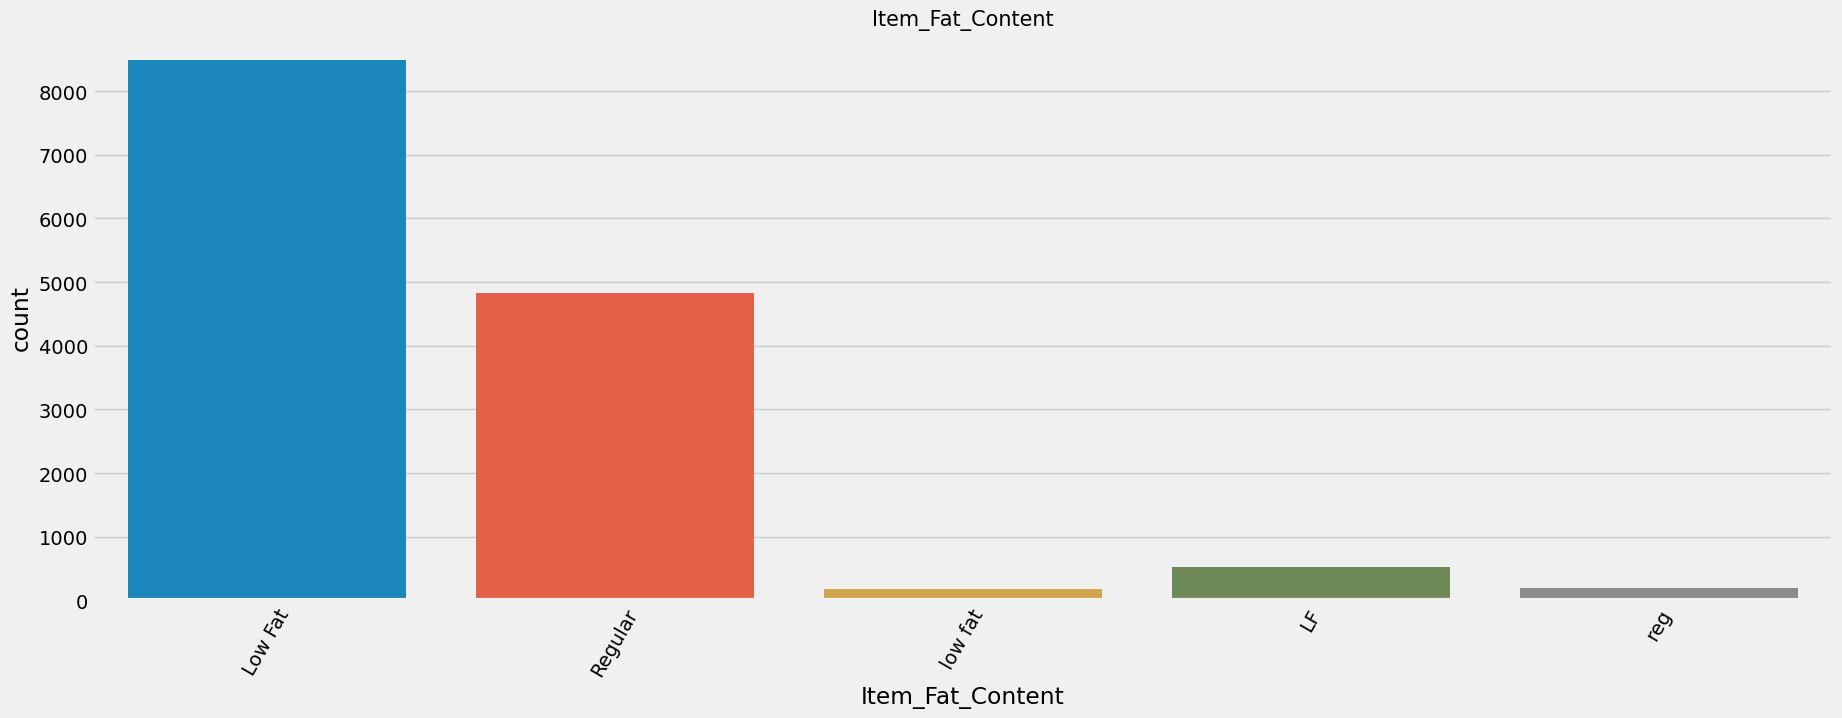

In [27]:
#count plot for all automobile information availble
for i in Train_categorical:   
    print('\t'*6,'***',i,'***','\n')
    print(df[i].value_counts())
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (20, 7))
    sns.countplot(x=df[i])
    plt.xticks(rotation=60)
    plt.title(i,fontsize=15)
    plt.show()
   

## Bivareiate Visualization

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

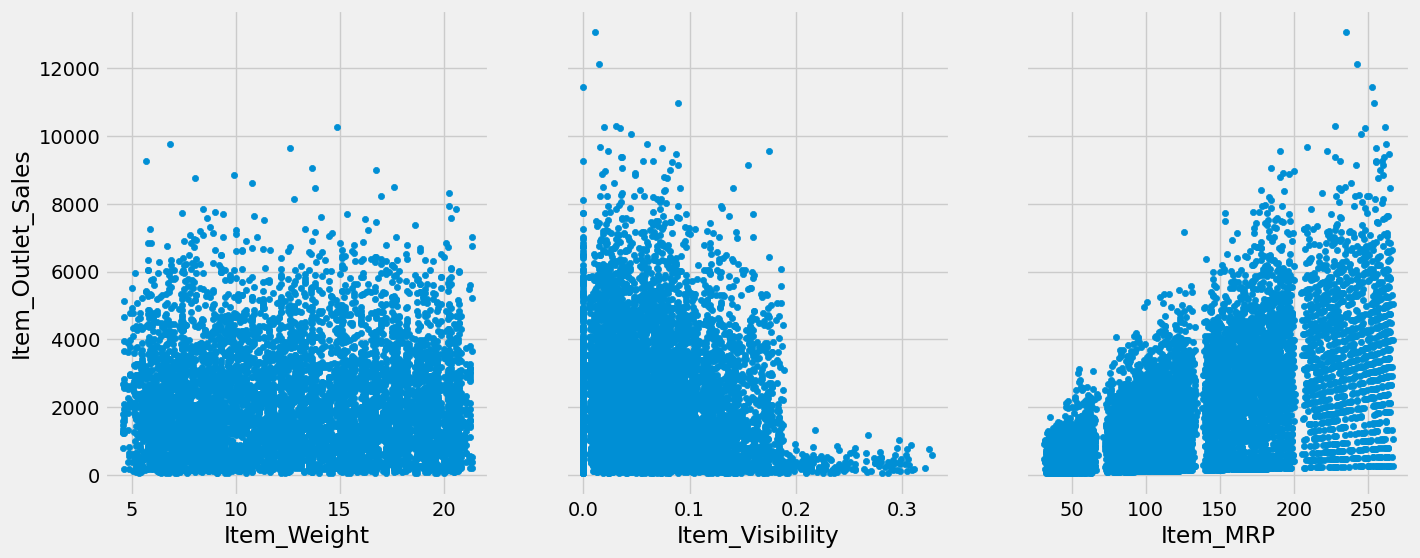

In [28]:
## Visualise relation ship between Item_Outlet_Sales and Item_Weight,Item_Visibility,Item_MRP
fig,axs = plt.subplots(1,3,sharey = True,figsize=(15,6))
#fig,axs = plt.subplots(1,3)
df.plot(kind = 'scatter' , x= 'Item_Weight' ,y='Item_Outlet_Sales',ax = axs[0] )
df.plot(kind = 'scatter' ,x = 'Item_Visibility',y ='Item_Outlet_Sales',ax = axs[1])
df.plot(kind = 'scatter',x = 'Item_MRP', y = 'Item_Outlet_Sales',ax = axs[2])

observation:

Item_visibility is increses then Item_outlet_sales is decreses

Item_MRP is increses then Item_outlet_sales is also increses

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

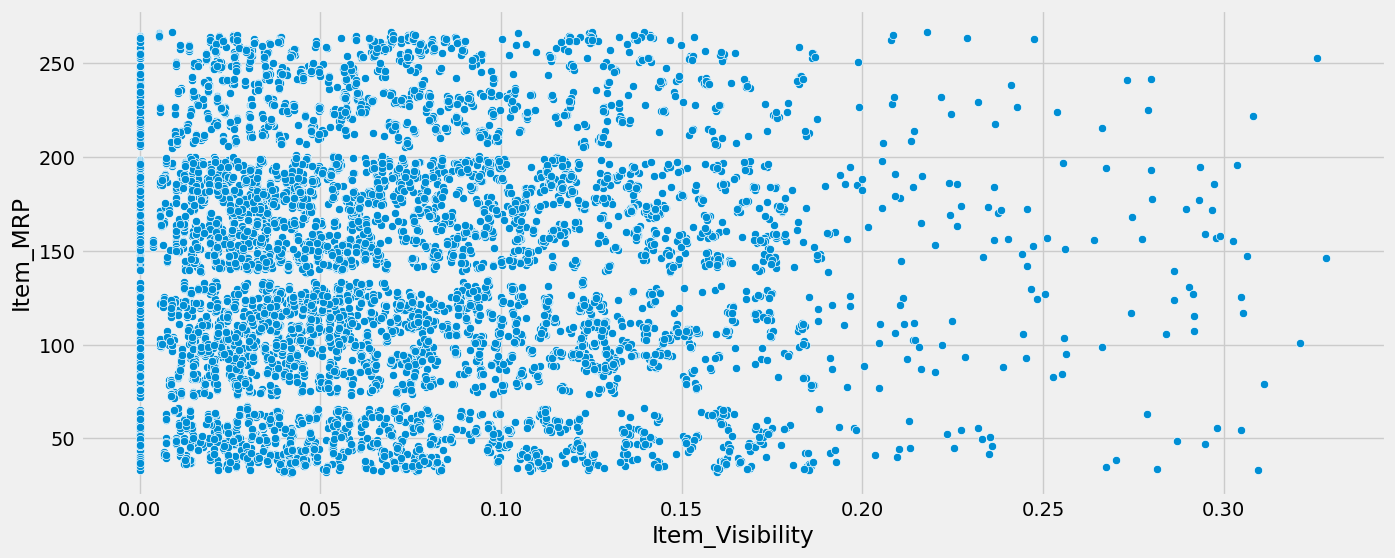

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_data,y='Item_MRP',x='Item_Visibility')

The Item which has  high MRP the visibility is less may be  the high MRp item availability in outlet is less Quantity 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

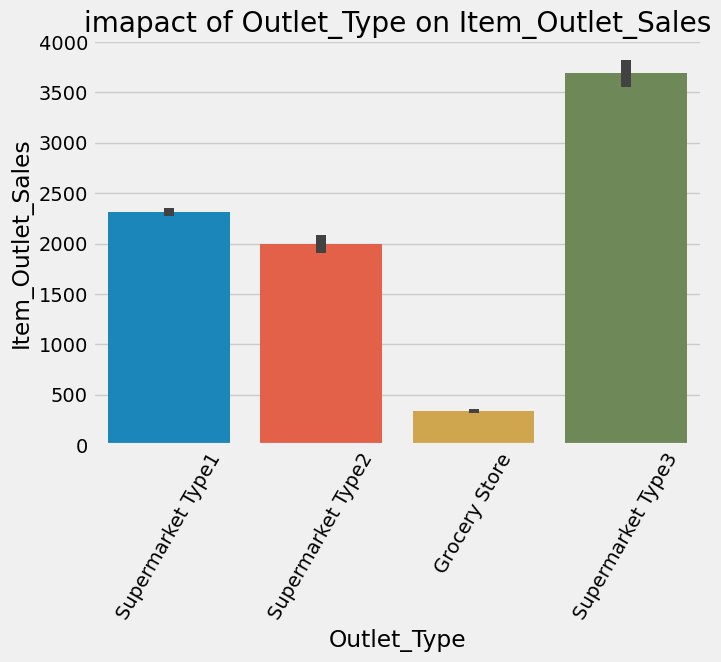

In [30]:
plt.figure(figsize = (7, 5))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)
plt.title("imapact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=60)

In above bar plot graph we saw that outlet  Supermarket type3 is less in quantity  but here the Item_Outlet_Sales is more in supermarket Type 3 

That means may be the Supermarket type3 is Big in size and present in Big city that why  saleing item are more 

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

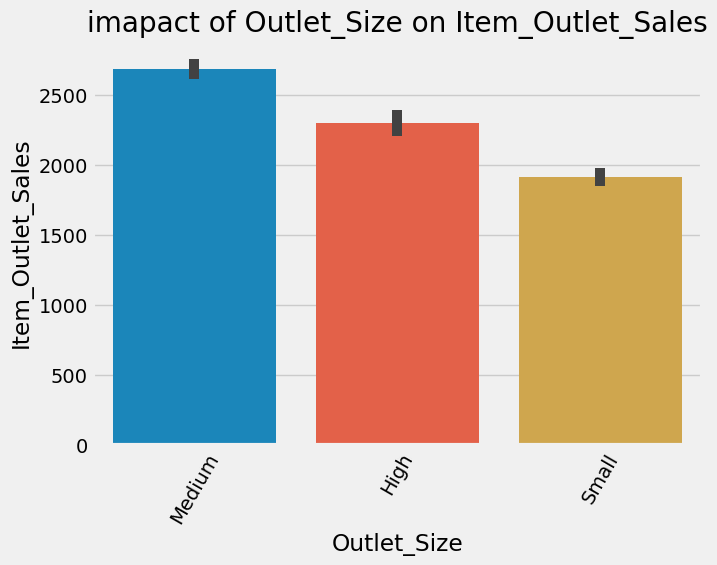

In [31]:
plt.figure(figsize = (7, 5))
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)
plt.title("imapact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=60)

Item_Outlet_sale is higer for Medium Size outlet.

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

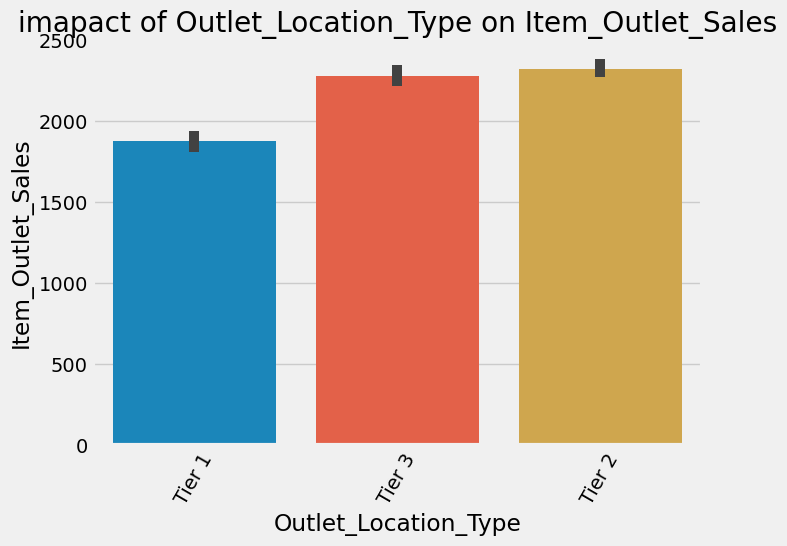

In [32]:
plt.figure(figsize = (7, 5))
sns.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df)
plt.title("imapact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=60)

Item outlet location is divided in three tier .The count of Tier3  is maximum but the saleing is more in Tier2 outlet as compair to other Tier. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

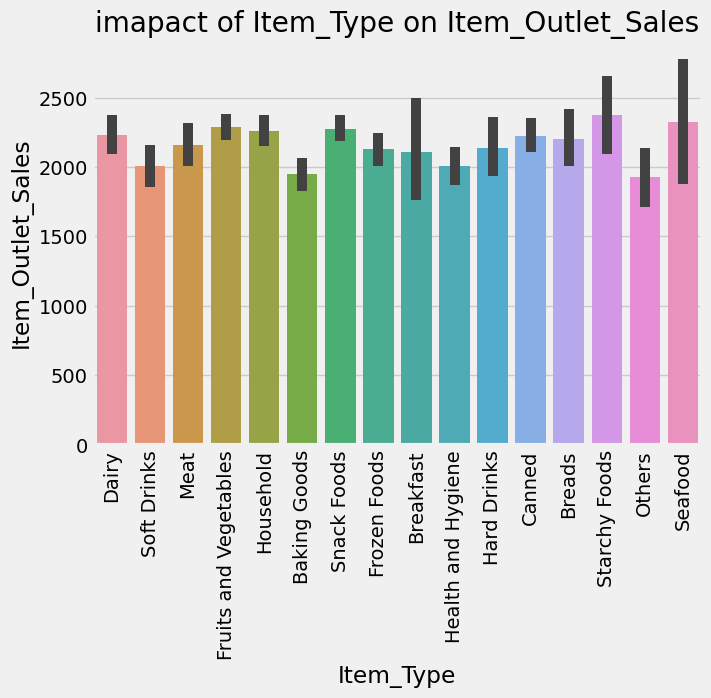

In [33]:
plt.figure(figsize = (7, 5))
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=df)
plt.title("imapact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)

Starchy and Sea Food as higher Item outlet sale.

## Correlations

In [34]:
train_data.corr( )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [35]:
# correlatin all columns with outcome in assending order

train_data.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

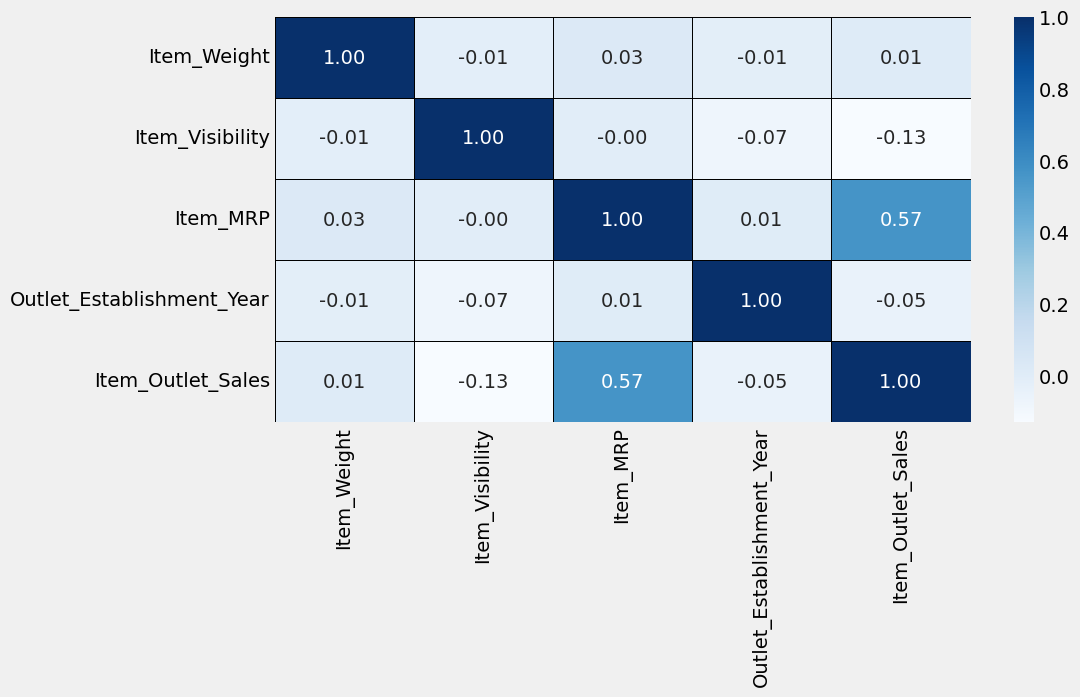

In [36]:
# Checking the Correlation between the target value and rest columns using Heatmap, Correlation Matrix.

plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(),cmap='Blues',annot=True,linewidths=0.5,linecolor="black",fmt="0.2f")

<AxesSubplot:title={'center':'Correlation with sales with respect to other features'}>

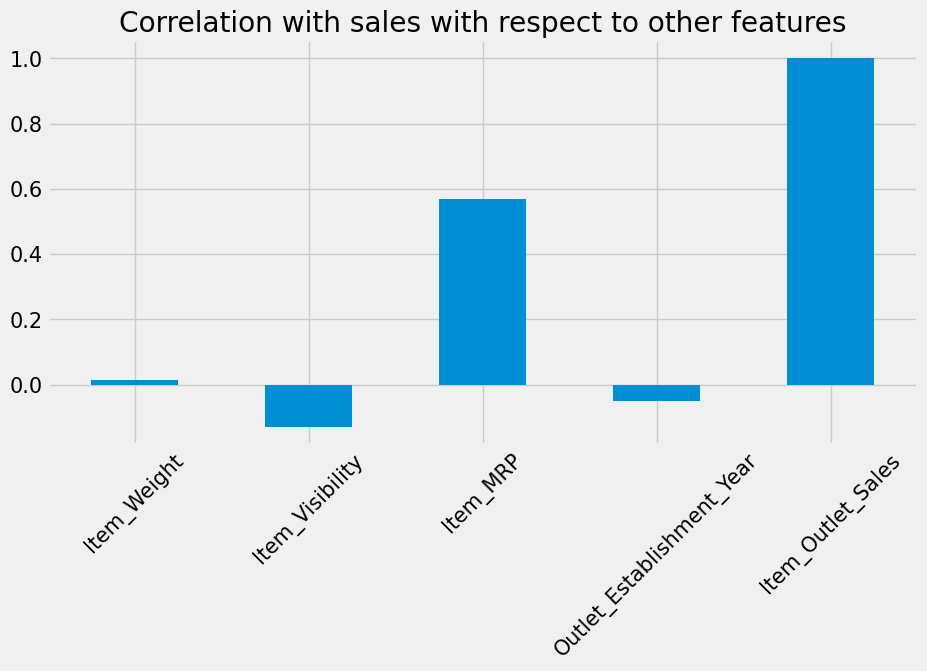

In [37]:
#Correlation with sales with respect to other columns
train_data.corrwith(train_data.Item_Outlet_Sales).plot.bar(
        figsize = (10, 5), title = "Correlation with sales with respect to other features", fontsize = 15,
        rot = 45, grid = True)

Observation:

Item MRP is positive correlated to Item_Outlet_SAle

Item-weight is no correlated to Item_Outlet_SAle

Item_Visibility is negative correlated to Item_Outlet_SAle

# Data Cleaning

### Treating The Missing Values

Replace by mean value:-

As I know missing value present in Item_Weight and Outlet_size From the box plot and distplot we plotted at beginnig we notice that the Item_Weight does not have any ouliers and normally distributed so we can replace Nan value by mean value

In [38]:
df["Item_Weight"].mean()# we will replace NaN value with this mean value

12.792854228644991

In [39]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)#missing value is replaced by mean

Replace by Mode :

Outlet_size also have missing values and it is categorical variable.So we can replace the NaN value by most frequent value (mode )that is Medium size outlet 

In [40]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [41]:
df["Outlet_Size"].fillna("Medium", inplace=True)#missing value is replaced by mode

### check for null value

In [42]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

missing value of Item_Outlet_Sales is 5681 because the test data of 5681 rows dont have Item_Outlet_Sales columns but we concatinate both train and test data for clening perpose

### Remove Outliers

Outliers present in Item_visibility sowe can remove it by using IQR or z-Score

In [43]:
outliers = ['Item_Visibility']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[i]<lower_limit,i] = lower_limit
    df.loc[df[i]>upper_limit,i] = upper_limit 

Now, our Item_Visibility features are free from outliers

### check outliers are removed

<AxesSubplot:xlabel='Item_Visibility'>

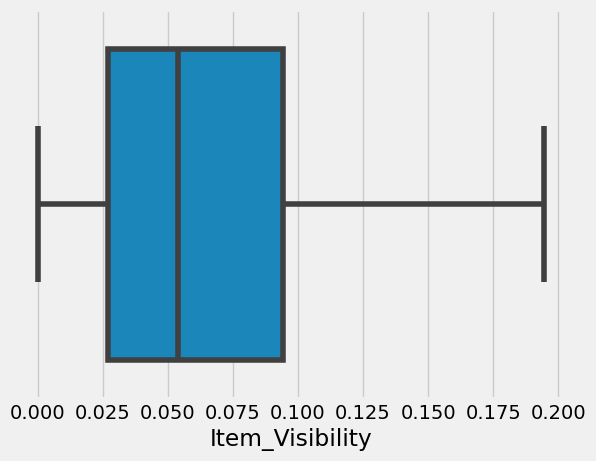

In [44]:
sns.boxplot(df['Item_Visibility'],data=df)

# Fetures Enginnering

### Item_Fat_Content

In [45]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Fat_Content have Low Fat, Regular and the same thing is present in different different speling so we can replace it by only two variable Low Fat and Regular

In [46]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':"Low Fat",'reg':"Regular",'low fat':"Low Fat"})

In [47]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

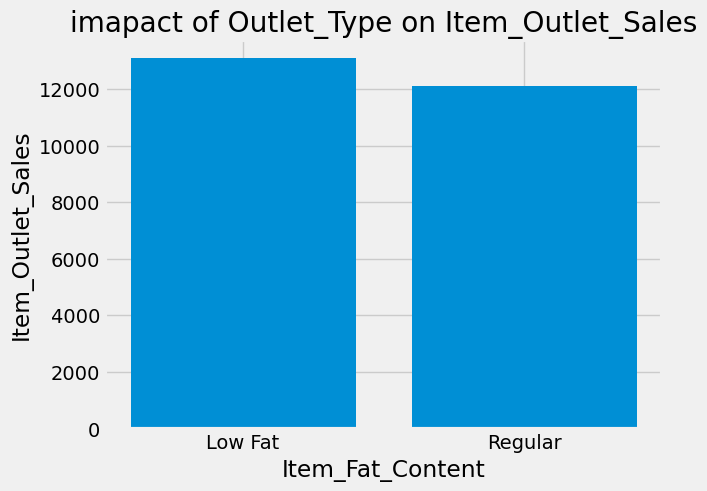

In [48]:

plt.bar(df['Item_Fat_Content'],df["Item_Outlet_Sales"])
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title("imapact of Outlet_Type on Item_Outlet_Sales")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

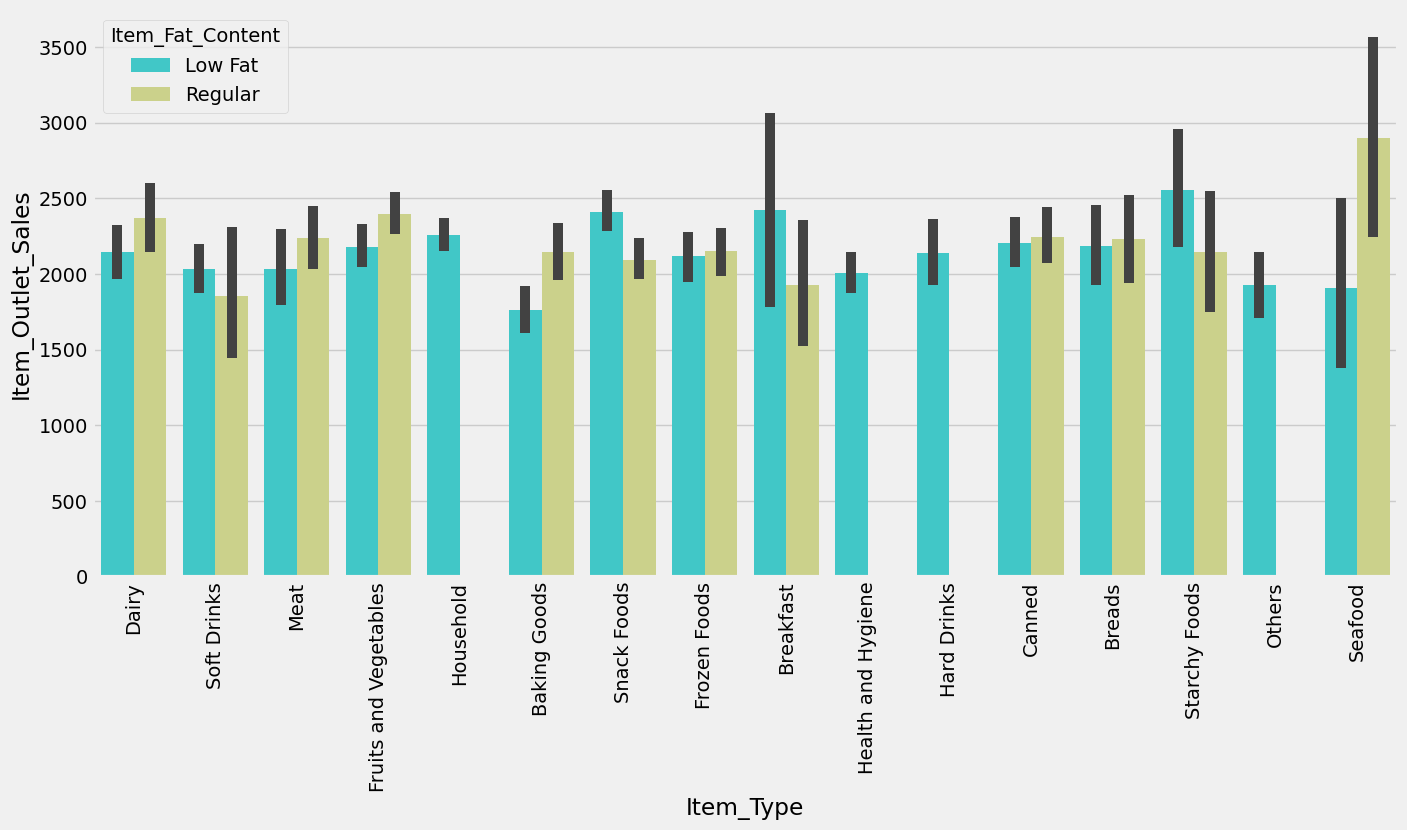

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(y= 'Item_Outlet_Sales' ,x='Item_Type',hue='Item_Fat_Content',data=df,palette="rainbow")
plt.xticks(rotation=90)

### Item_Visibility

Item_Visibility
As we know in description of data we saw that the minimum value of Item_Visibility is 0 means that Item which Item_visibility is value 0 out of stock in this case we need to treat as missing value and fill it by median value because we saw that skewness and outliers present in Item_Visbility column

In [50]:
# find item_visibility count with 0 value

df[df["Item_Visibility"]==0]['Item_Visibility'].count()

879

In [51]:
#Determine average visibility of a product
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))

df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [52]:
#check for min value of Item visibility
df['Item_Visibility'].min()

0.003574698

### Outlet_Years

Convert the Outlet_Establishment_Years into how old the establishments are

In [53]:
df["Outlet_Establishment_Year"].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [54]:
df["Outlet_Years"]=2009-df["Outlet_Establishment_Year"]
df["Outlet_Years"].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

maximum 24 year ago outlet is established

In [55]:
df['Outlet_Years'].head(5)

0    10
1     0
2    10
3    11
4    22
Name: Outlet_Years, dtype: int64

### Item_Type

In [56]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

There are 16 categories in Item_Type but Basicaly there is 3 type of item  either Food ,Drink or not_consumables

### Item_Identifier

In [57]:
df["Item_Identifier"].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Identifier is a Id for Every Item_Type

when we closely check Item_identifier shows that they either start with FD(Food),DR(Drink)or NC(non consumable)so we can categorised this column by Food Drink and Non consumable

In [58]:
# changing first two caharacters
df["New_Item_Type"]=df["Item_Identifier"].apply(lambda x : x[0:2])

In [59]:
# rename them to more intutive category
df["New_Item_Type"]=df["New_Item_Type"].map({"FD":"Food","DR":"Drink","NC":"Non-concumable"})

In [60]:
df["New_Item_Type"].value_counts()

Food              10201
Non-concumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

Now we  conver 16 item category into 3 category 

### If a product is Non-consumable then no fat content are there
so we cerate seperate category (non_eidible )for nan-consumable item in item-fat-content column

In [61]:
# mark non_consumable in seperate category in low fat
df.loc[df["New_Item_Type"]=="Non-concumable",'Item_Fat_Content']="Non_Edible"

In [62]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

## Dealing with catigorical variable

### Lable Encoding:
    
chenge categorical value into numerical value

In [63]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drink
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food
3,FDX07,19.200000,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food
4,NCD19,8.930000,Non_Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-concumable
5,FDP36,10.395000,Regular,0.057059,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,0,Food
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,22,Food
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,24,Food
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,7,Food
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,2,Food


In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
#for chenging all catigorical value into numeric value

df=df.apply(le.fit_transform)

In [66]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type
0,156,284,0,1163,4,7567,9,4,1,0,1,2540,1,4,1
1,8,57,2,1534,14,632,3,8,1,2,2,422,1,0,0
2,662,376,0,1246,10,3897,9,4,1,0,1,1639,1,4,1
3,1121,393,2,1376,6,5626,0,3,1,2,0,670,1,5,1
4,1297,265,1,336,9,848,1,1,0,2,1,865,1,7,2
5,758,297,2,6879,0,756,3,8,1,2,2,523,1,0,1
6,696,334,2,704,13,999,1,1,0,2,1,332,1,7,1
7,738,324,0,11859,13,2694,5,0,1,2,3,2658,1,8,1
8,440,363,2,1234,5,2224,7,5,1,1,1,930,1,3,1
9,990,393,2,10125,5,5883,2,7,1,1,1,2911,1,1,1


In [67]:
df.dtypes

Item_Identifier              int32
Item_Weight                  int64
Item_Fat_Content             int32
Item_Visibility              int64
Item_Type                    int32
Item_MRP                     int64
Outlet_Identifier            int32
Outlet_Establishment_Year    int64
Outlet_Size                  int32
Outlet_Location_Type         int32
Outlet_Type                  int32
Item_Outlet_Sales            int64
source                       int32
Outlet_Years                 int64
New_Item_Type                int32
dtype: object

Here we can see that all variables are now int and each category has a new variable.

### Drop the columns which have been converted to different types:¶

In [68]:
df.drop(["Item_Type","Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [69]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type
0,284,0,1163,7567,1,0,1,2540,1,4,1
1,57,2,1534,632,1,2,2,422,1,0,0
2,376,0,1246,3897,1,0,1,1639,1,4,1
3,393,2,1376,5626,1,2,0,670,1,5,1
4,265,1,336,848,0,2,1,865,1,7,2


### Exporting Data

Final step is to convert data back into train and test data sets

In [70]:
df["source"].value_counts()

1    8523
0    5681
Name: source, dtype: int64

In [71]:
#Divide into test and train:
train= df.loc[df['source']==1]
test = df.loc[df['source']==0]

In [72]:
# find out shape of each train and test data
print(train.shape)
print(test.shape)

(8523, 11)
(5681, 11)


In [73]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


In [74]:
# find out shape of each train and test data
print(train.shape)
print(test.shape)

(8523, 10)
(5681, 9)


### Export files as modified versions:

In [75]:
#Export files as modified versions:
train.to_csv("train_mod.csv",index=False)
test.to_csv("test_mo.csv",index=False)

#### Use Train data file for the model building purpose and Test file for getting predictions from the trained model.

# Data Preprocessing

### Feature and Label Seperation

Divide train data into dependent and independent features

In [76]:
x=train.drop("Item_Outlet_Sales",axis=1)
y=train["Item_Outlet_Sales"]

In [77]:
print(x.shape)
print(y.shape)

(8523, 9)
(8523,)


### check for Skewness

### Remove Skewness

In [78]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type
0,-0.401722,-1.043084,-1.545318,1.469119,-0.293295,-1.373843,-0.123488,0.009088,-0.171676
1,-2.070967,1.157920,-1.404543,-1.588532,-0.293295,1.088324,1.040591,-1.685966,-2.126152
2,0.964159,-1.043084,-1.512820,0.074430,-0.293295,-1.373843,-0.123488,0.009088,-0.171676
3,1.261536,1.157920,-1.463141,0.763549,-0.293295,1.088324,-1.915952,0.355101,-0.171676
4,-0.633120,0.379048,-1.924309,-1.443592,-1.925925,1.088324,-0.123488,1.002098,1.720018


#### check skewness are removed or not

In [79]:
x.skew().sort_values()

Item_Weight            -0.627329
Item_Visibility        -0.297272
Item_MRP               -0.280149
Outlet_Years           -0.220845
Outlet_Location_Type   -0.220632
Outlet_Size            -0.042980
Outlet_Type             0.007863
Item_Fat_Content        0.036072
New_Item_Type           0.050021
dtype: float64

Now we can see skewness is removed

### Scaling the Data

In [80]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type
0,-0.401722,-1.043084,-1.545318,1.469119,-0.293295,-1.373843,-0.123488,0.009088,-0.171676
1,-2.070967,1.157920,-1.404543,-1.588532,-0.293295,1.088324,1.040591,-1.685966,-2.126152
2,0.964159,-1.043084,-1.512820,0.074430,-0.293295,-1.373843,-0.123488,0.009088,-0.171676
3,1.261536,1.157920,-1.463141,0.763549,-0.293295,1.088324,-1.915952,0.355101,-0.171676
4,-0.633120,0.379048,-1.924309,-1.443592,-1.925925,1.088324,-0.123488,1.002098,1.720018


In [81]:
import pickle
pickle.dump(scaler,open('scaling_1.pkl','wb'))

### Principle Component Analysis

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type
0,0.593823,0.492986,1.028754,-1.300666,-0.688286,1.624675,-0.530445,-0.065204,-1.034087
1,-1.647416,1.174037,2.233919,2.261720,0.815051,0.455826,0.600105,2.062529,0.397261
2,0.575380,0.431505,0.777828,-1.694905,0.811549,0.472296,-0.592640,0.022794,-1.049605
3,-0.121940,-1.113617,-0.481185,-1.307838,0.068445,0.381470,-1.490964,1.900587,1.253215
4,-1.934267,-1.368464,-0.309427,0.499872,2.044006,1.769519,-1.354487,-0.301430,-0.092970


### Checking Multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Item_Weight,1.0
1,Item_Fat_Content,1.0
2,Item_Visibility,1.0
3,Item_MRP,1.0
4,Outlet_Size,1.0
5,Outlet_Location_Type,1.0
6,Outlet_Type,1.0
7,Outlet_Years,1.0
8,New_Item_Type,1.0


After PCA and Scaling the data our multicollinearity observed in correlation plot is removed.

### Finding Best Random State For Regression Models

In [84]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.6195507801701226 on Random State 464


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=464)

### Feature Importance

,Importance
Features,
Outlet_Size,0.294
New_Item_Type,0.167
Item_Weight,0.153
Item_MRP,0.105
Outlet_Type,0.092
Outlet_Location_Type,0.067
Item_Fat_Content,0.046
Item_Visibility,0.041
Outlet_Years,0.036


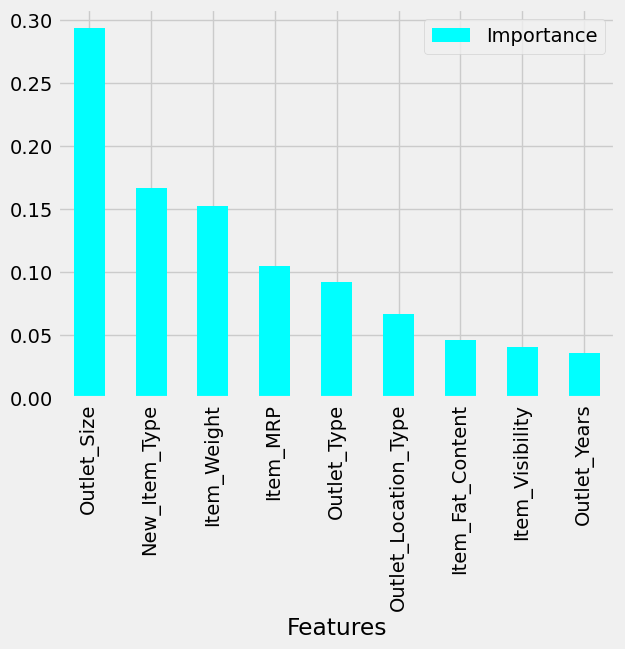

In [86]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

# Model Building

### Training Regression Models

In [87]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=15)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=200, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(criterion='mae', min_samples_split= 2, n_estimators= 100, n_jobs= 1, random_state= 199)



models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))

In [88]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]
Train_score=[]
Test_score=[]


****************************************** LinearRegression ********************************************************


LinearRegression()


The training accuracy  is 57.33085057218232
The test accuracy  is 61.955078017012255
R2 Score is: 61.955078017012255


Cross Validation Score: 58.14869678918896


R2 Score - Cross Validation Score is 3.8063812278232945


RMSE Score is: 576.0214684105986




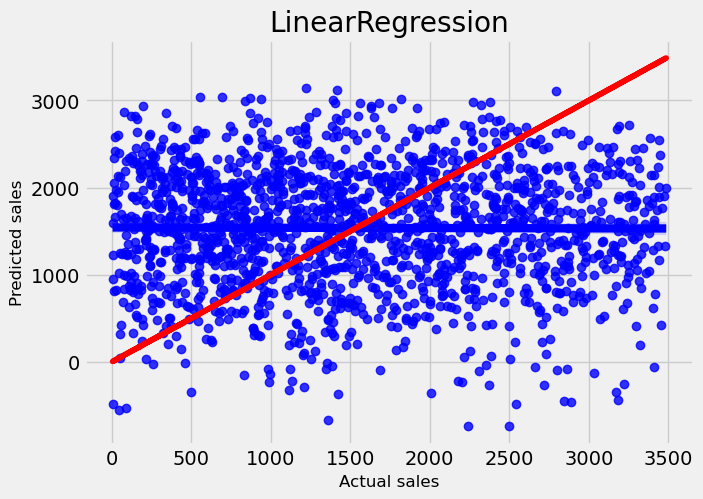

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


The training accuracy  is 57.325061308653034
The test accuracy  is 61.917191841392096
R2 Score is: 61.917191841392096


Cross Validation Score: 58.14502168278142


R2 Score - Cross Validation Score is 3.7721701586106775


RMSE Score is: 576.3082060227662




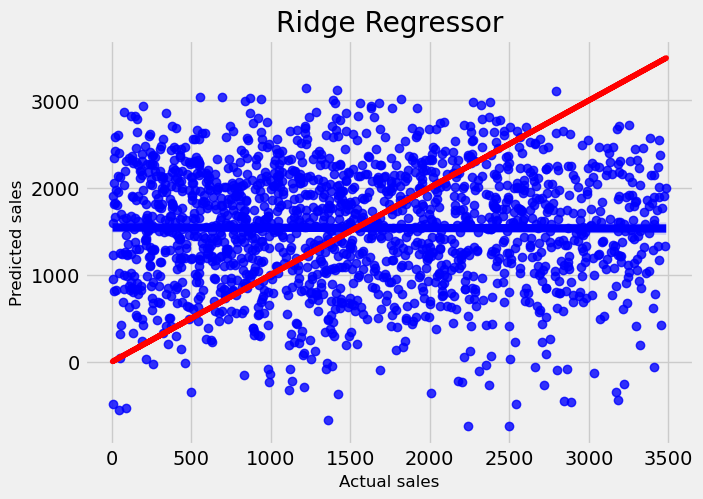

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=15, normalize=True)


The training accuracy  is 57.33010350494351
The test accuracy  is 61.941465266953834
R2 Score is: 61.941465266953834


Cross Validation Score: 58.148314937493794


R2 Score - Cross Validation Score is 3.7931503294600404


RMSE Score is: 576.1245115314895




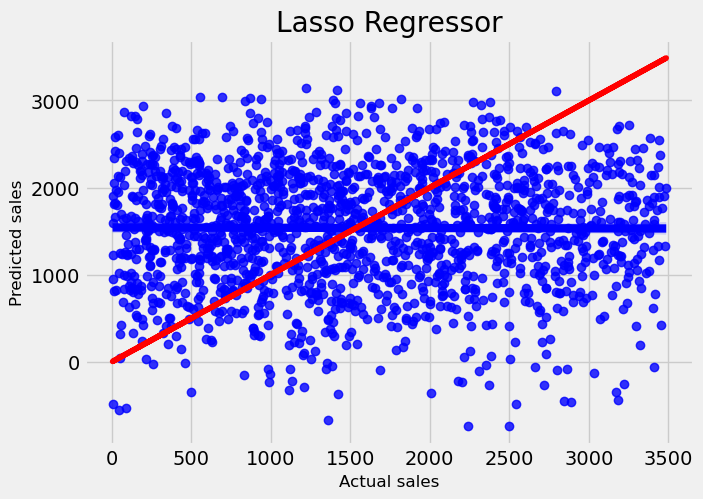

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


The training accuracy  is 99.99999837684574
The test accuracy  is 13.963141928739342
R2 Score is: 13.963141928739342


Cross Validation Score: 6.570284548906901


R2 Score - Cross Validation Score is 7.39285737983244


RMSE Score is: 866.2287467189188




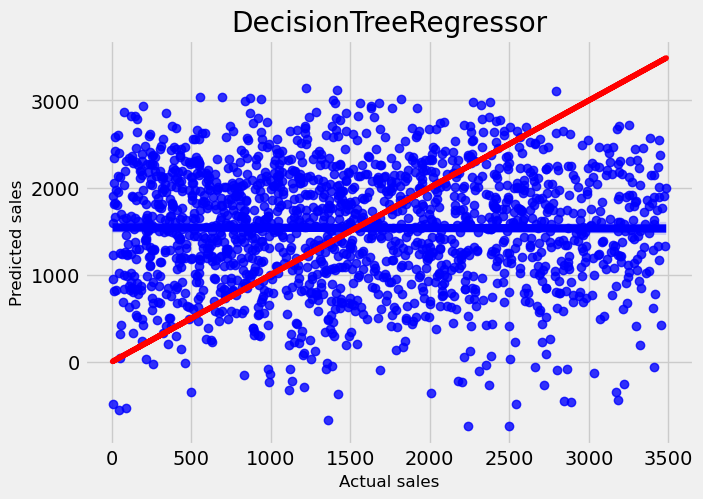

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


The training accuracy  is 36.153062085467916
The test accuracy  is 37.07519002319746
R2 Score is: 37.07519002319746


Cross Validation Score: 36.00375692090994


R2 Score - Cross Validation Score is 1.0714331022875143


RMSE Score is: 740.8005180549915




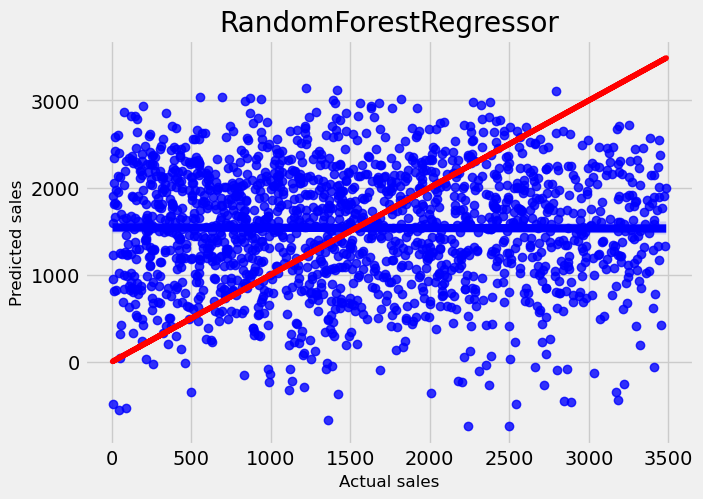

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


The training accuracy  is 82.14731409525994
The test accuracy  is 51.42865692908431
R2 Score is: 51.42865692908431


Cross Validation Score: 47.640475786562405


R2 Score - Cross Validation Score is 3.788181142521907


RMSE Score is: 650.8492028860147




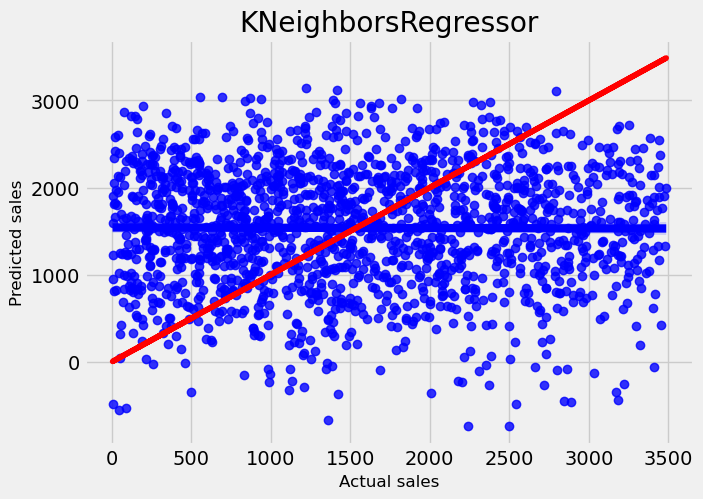

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


The training accuracy  is 17.964328452818467
The test accuracy  is 20.971753026594644
R2 Score is: 20.971753026594644


Cross Validation Score: 15.787414873636282


R2 Score - Cross Validation Score is 5.184338152958363


RMSE Score is: 830.1976414324976




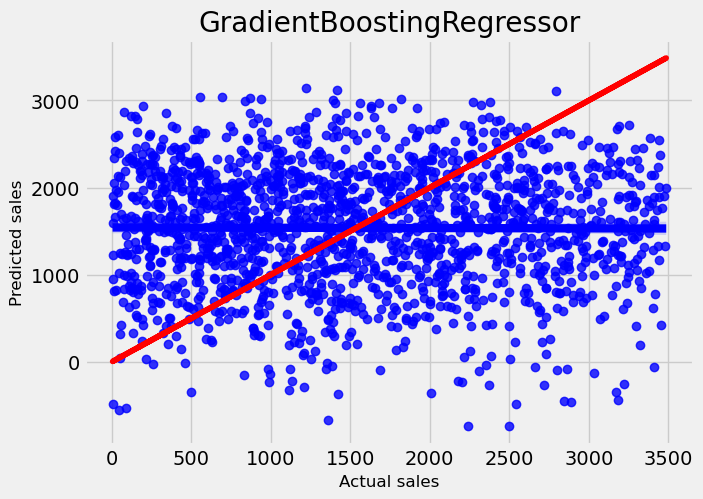

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=200, random_state=42)


The training accuracy  is 53.03707386043697
The test accuracy  is 55.46844728309006
R2 Score is: 55.46844728309006


Cross Validation Score: 52.42957179000196


R2 Score - Cross Validation Score is 3.0388754930880992


RMSE Score is: 623.19540165467




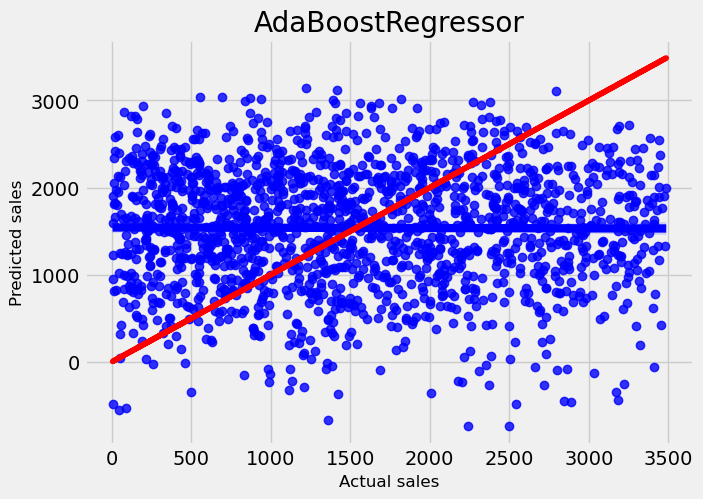

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(criterion='mae', n_jobs=1, random_state=199)


The training accuracy  is 100.0
The test accuracy  is 63.857770285429595
R2 Score is: 63.857770285429595


Cross Validation Score: 60.00673755098613


R2 Score - Cross Validation Score is 3.8510327344434643


RMSE Score is: 561.432813696885




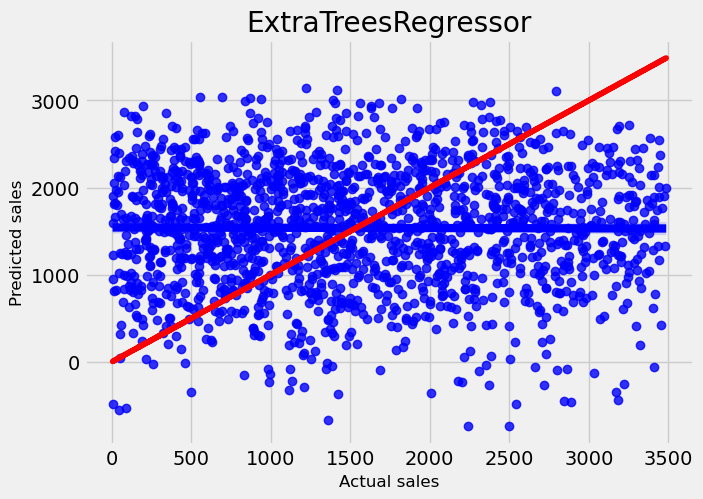

In [89]:
for name,model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(x_train, y_train) 
    #model.score(x_train,y_train)
    
    print(model)
    
     # Predicting 
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    
    print('\n') 
    
    
    # calculating scores
    train_score=r2_score(y_train, pred_train, multioutput='variance_weighted')*100
    test_score=r2_score(y_test, pred_test, multioutput='variance_weighted')*100
    r2 = r2_score(y_test, pred_test, multioutput='variance_weighted')*100
    print('The training accuracy  is', train_score)
    print('The test accuracy  is', test_score)
    print("R2 Score is:", r2)
    Train_score.append(train_score)
    Test_score.append(test_score)
    score.append(r2)
    
    
    
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    print('\n')
    
     
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred_test, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    
    print('\n')
    
    #plots created
    
    plt.figure(figsize=(7,5))  
    sns.regplot(y_test,pred,color='b')
    plt.plot(y_test,y_test,color='r')
    plt.xlabel('Actual sales',fontsize=12)
    plt.ylabel('Predicted sales',fontsize=12)
    plt.title(name)
    plt.show()

### Compair All Model Performance

In [90]:
#Plotting performance table

Performance_table=pd.DataFrame({'Model':Model,
                'Training score':Train_score,                
            'R2 Score': score,
            'CV Score': cvs,
            'diff bet R2 and CV' :difference,
            'MSE ':RMSE
        }).style.background_gradient(cmap='coolwarm')

Performance_table

,Model,Training score,R2 Score,CV Score,diff bet R2 and CV,MSE
0,LinearRegression,57.330851,61.955078,58.148697,3.806381,576.021468
1,Ridge Regressor,57.325061,61.917192,58.145022,3.772170,576.308206
2,Lasso Regressor,57.330104,61.941465,58.148315,3.793150,576.124512
3,DecisionTreeRegressor,99.999998,13.963142,6.570285,7.392857,866.228747
4,RandomForestRegressor,36.153062,37.075190,36.003757,1.071433,740.800518
5,KNeighborsRegressor,82.147314,51.428657,47.640476,3.788181,650.849203
6,GradientBoostingRegressor,17.964328,20.971753,15.787415,5.184338,830.197641
7,AdaBoostRegressor,53.037074,55.468447,52.429572,3.038875,623.195402
8,ExtraTreesRegressor,100.000000,63.857770,60.006738,3.851033,561.432814


<AxesSubplot:>

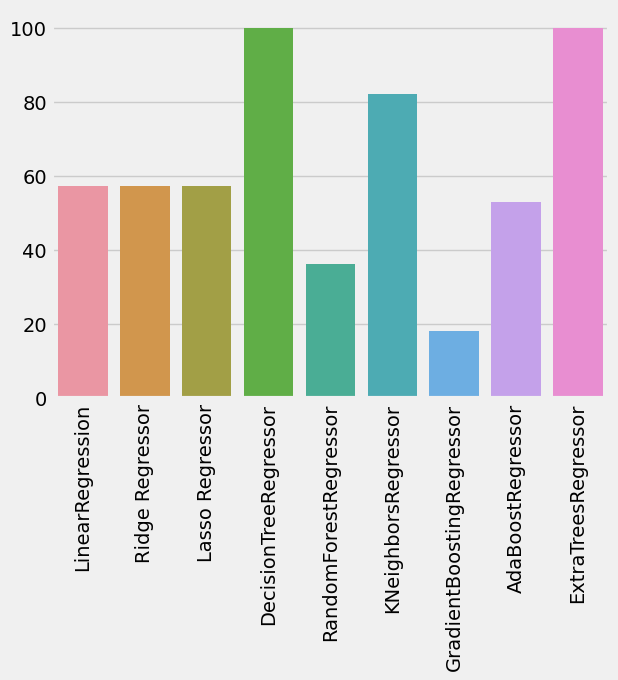

In [91]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=Train_score)

<AxesSubplot:>

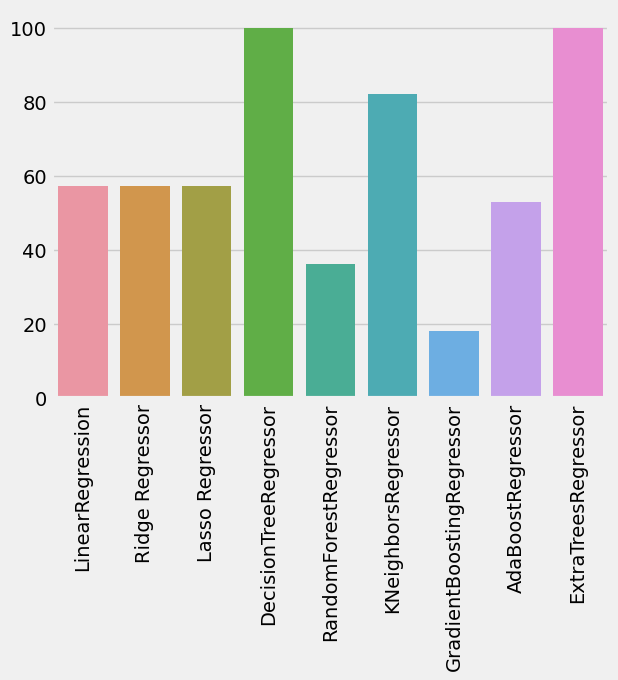

In [92]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=Train_score)

<AxesSubplot:>

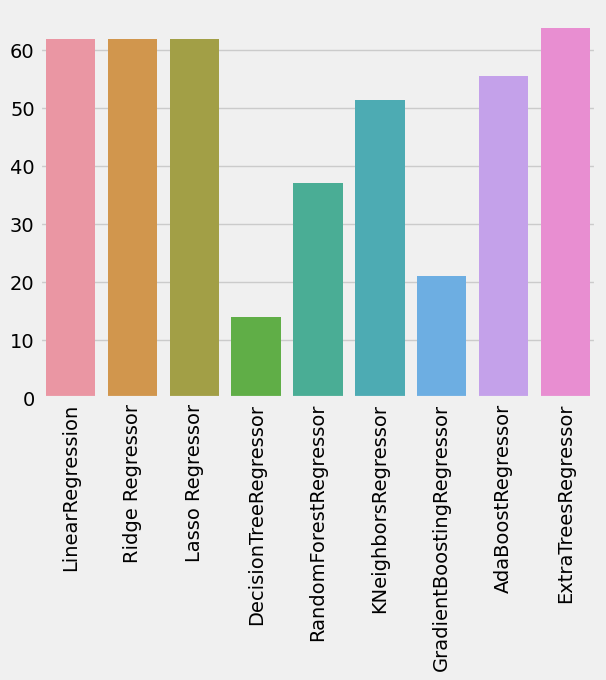

In [93]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=score)
 

<AxesSubplot:>

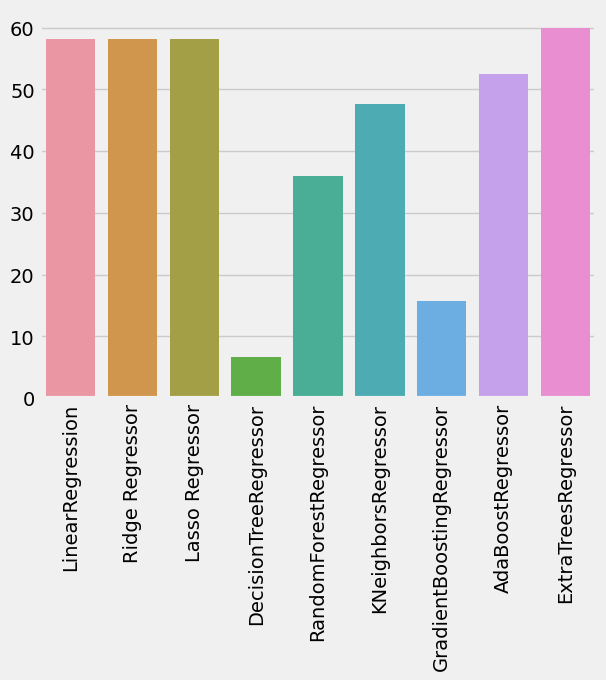

In [94]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=cvs)
 

<AxesSubplot:>

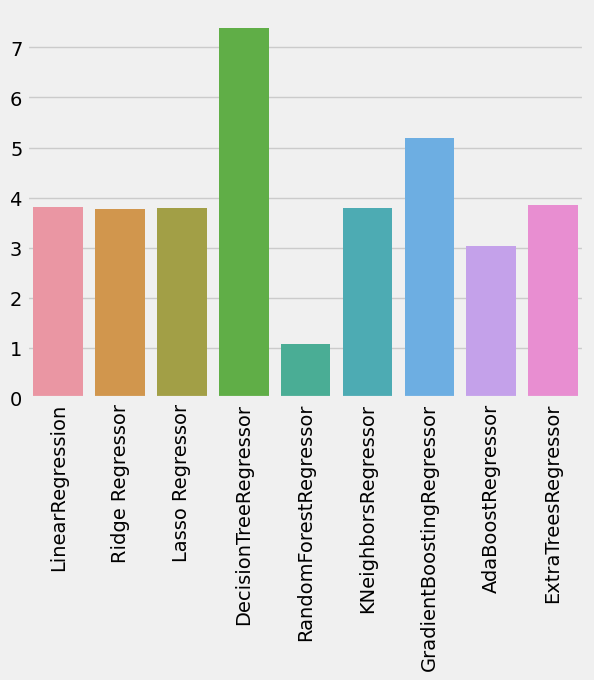

In [95]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=difference)

Observation:
    
1. Traning score of the Decision tree and Extra tree is 100% means both model is overfitted.

2. The Train and Test acuuracy is very low  for  ForRandomForest and GradientBoosting  means our this model is underfitted.

3. The Train and Test accuracy is good for Linear,Ridge and Lasso regression.

4. Ridge Regression is best model because Difference between R2 score and cross validation score is minimum and Mean square error is also less.

    
    
    

## Hyper Parameter Tuning For best model

Ridge Regression is our best model :
    
-Minimum difference between cross validation and R2 score.

-Less value of mean square error.

-Not to much difference between training accuracy and test accuracy means our model is not overfitted and underfitted. 

#### Obtaining best params

In [96]:
param={'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
RR= Ridge()
grd=GridSearchCV(RR,param)
grd.fit( x_train,y_train)
print(grd.best_params_)

{'alpha': 0, 'fit_intercept': True, 'solver': 'sag'}


#### Apply best parameter into our best model

In [97]:
RR = Ridge(alpha=0.01,fit_intercept=True,solver='saga')
RR.fit(x_train,y_train)
pred_rr = RR.predict(x_test)
scr = cross_val_score(RR,x,y,cv=5)
print("r2 score= ",r2_score(y_test,pred_rr)*100)
print('Cross validation score for Ridge Model is ',scr.mean()*100)
print("MSE= ",mean_squared_error(y_test,pred_rr))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,pred_rr)))

r2 score=  61.95531017513505
Cross validation score for Ridge Model is  58.14845105657267
MSE=  331798.7073519876
RMSE=  576.019710905788


#### Best fit line for our best model

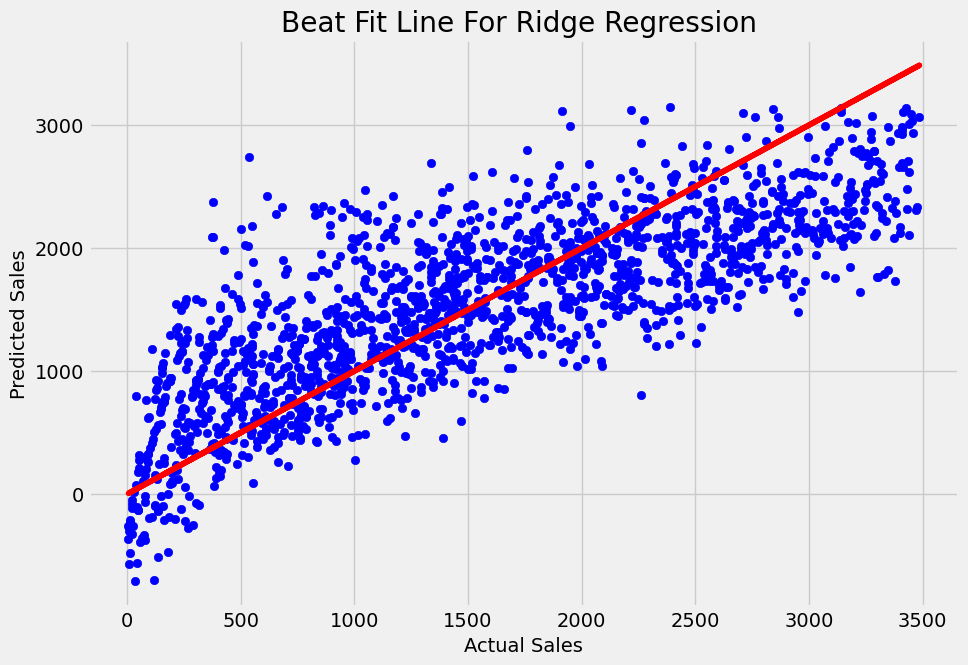

In [98]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=pred_rr,color="b")
plt.plot(y_test,y_test,color="r")
plt.xlabel("Actual Sales",fontsize=14)
plt.ylabel("Predicted Sales",fontsize=14)
plt.title("Beat Fit Line For Ridge Regression ")
plt.show()

# Model Saving

#### Saving ,Loading and Prediction of our best model

In [99]:
import pickle

filename="BigDataMart.pkl"
pickle.dump(RR,open(filename,"wb"))

In [100]:
loaded_model=pickle.load(open("BigDataMart.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

61.95531017513505


In [101]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_rr[:]],index=["predicted","original"]).T

In [102]:
conclusion

,predicted,original
0,752.194108,752.194108
1,1302.173544,1302.173544
2,937.748434,937.748434
3,2098.522539,2098.522539
4,-469.030197,-469.030197
...,...,...
1700,2017.344566,2017.344566
1701,2273.538262,2273.538262
1702,1337.032313,1337.032313
1703,1285.626127,1285.626127
